# Changing Vector Basis

This notebook explores the concept of changing the basis of a vector. 

A vector's coordinates are defined by a set of **basis vectors**. For example, the vector $\vec{r} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ is typically understood in the context of the standard basis vectors, $\vec{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\vec{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. This means $\vec{r} = 3\vec{e_1} + 4\vec{e_2}$.

What if we want to represent this same vector $\vec{r}$ using a *different* set of basis vectors, say $\vec{b_1}$ and $\vec{b_2}$? We need to find the new coordinates (scalar multipliers) $c_1$ and $c_2$ such that:

$$\vec{r} = c_1\vec{b_1} + c_2\vec{b_2}$$

The coordinates $\begin{bmatrix} c_1 \\ c_2 \end{bmatrix}$ represent the vector $\vec{r}$ in the new basis.

## The Problem

Let's define our vectors:
- **Original Vector:** $\vec{r} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$
- **New Basis Vectors:** $\vec{b_1} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ and $\vec{b_2} = \begin{bmatrix} -2 \\ 4 \end{bmatrix}$

Our goal is to find the coordinates $[c_1, c_2]$ of $\vec{r}$ with respect to the basis $B = \{\vec{b_1}, \vec{b_2}\}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
r = np.array([3, 4])
b1 = np.array([2, 1])
b2 = np.array([-2, 4])

print(f"Vector r: {r}")
print(f"Basis vector b1: {b1}")
print(f"Basis vector b2: {b2}")

Vector r: [3 4]
Basis vector b1: [2 1]
Basis vector b2: [-2  4]


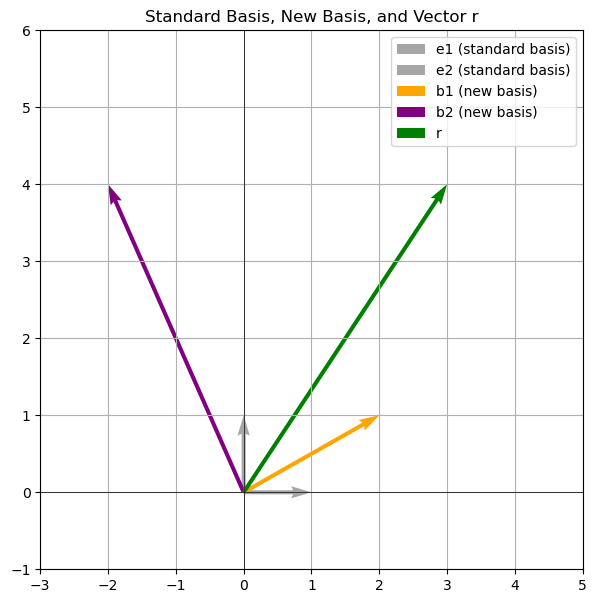

In [3]:
# Show using coordinate plane.
e1 = np.array([1, 0])
e2 = np.array([0, 1])

origin = np.array([0, 0])

plt.figure(figsize=(7, 7))

# Plot standard basis
plt.quiver(*origin, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.7, label='e1 (standard basis)')
plt.quiver(*origin, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.7, label='e2 (standard basis)')

# Plot new basis
plt.quiver(*origin, b1[0], b1[1], angles='xy', scale_units='xy', scale=1, color='orange', label='b1 (new basis)')
plt.quiver(*origin, b2[0], b2[1], angles='xy', scale_units='xy', scale=1, color='purple', label='b2 (new basis)')

# Plot r
plt.quiver(*origin, r[0], r[1], angles='xy', scale_units='xy', scale=1, color='green', label='r')

plt.xlim(-3, 5)
plt.ylim(-1, 6)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title("Standard Basis, New Basis, and Vector r")
plt.show()

## Step 1: Check if the New Basis is Orthogonal

The process of finding the new coordinates is much simpler if the new basis vectors are **orthogonal** (i.e., at a 90° angle to each other).

We can check for orthogonality by calculating the **dot product** of the basis vectors. Two vectors are orthogonal if and only if their dot product is zero.

$$\vec{b_1} \cdot \vec{b_2} = 0 \implies \text{The vectors are orthogonal}$$


In [4]:
# Calculate the dot product of b1 and b2
dot_product = np.dot(b1, b2)

print(f"The dot product of b1 and b2 is: {dot_product}")

if dot_product == 0:
    print("✅ The basis vectors are orthogonal!")
else:
    print("❌ The basis vectors are not orthogonal.")

The dot product of b1 and b2 is: 0
✅ The basis vectors are orthogonal!


## Step 2: Find New Coordinates Using Projections

Since our basis vectors are orthogonal, we can find the new coordinates $c_1$ and $c_2$ by projecting our vector $\vec{r}$ onto each basis vector.

The coordinate $c_1$ is the scalar projection of $\vec{r}$ onto $\vec{b_1}$, and $c_2$ is the scalar projection of $\vec{r}$ onto $\vec{b_2}$. The formula for these scalar projections (our new coordinates) is:

$$c_1 = \frac{\vec{r} \cdot \vec{b_1}}{|\!|\vec{b_1}|\!|^2}$$
$$c_2 = \frac{\vec{r} \cdot \vec{b_2}}{|\!|\vec{b_2}|\!|^2}$$

In [5]:
# Calculate the numerator for c1 (dot product of r and b1)
r_dot_b1 = np.dot(r, b1)

# Calculate the denominator for c1 (squared magnitude of b1)
b1_mag_sq = np.dot(b1, b1) # or np.linalg.norm(b1)**2

c1 = r_dot_b1 / b1_mag_sq

print(f"r . b1 = {r_dot_b1}")
print(f"||b1||^2 = {b1_mag_sq}")
print(f"c1 = {r_dot_b1} / {b1_mag_sq} = {c1}")

print("-"*20)

# Calculate the numerator for c2 (dot product of r and b2)
r_dot_b2 = np.dot(r, b2)

# Calculate the denominator for c2 (squared magnitude of b2)
b2_mag_sq = np.dot(b2, b2)

c2 = r_dot_b2 / b2_mag_sq

print(f"r . b2 = {r_dot_b2}")
print(f"||b2||^2 = {b2_mag_sq}")
print(f"c2 = {r_dot_b2} / {b2_mag_sq} = {c2}")

print("\n" + "="*40)
print(f"✨ The new coordinates of r in basis B are: [{c1}, {c2}]")
print("="*40)


r . b1 = 10
||b1||^2 = 5
c1 = 10 / 5 = 2.0
--------------------
r . b2 = 10
||b2||^2 = 20
c2 = 10 / 20 = 0.5

✨ The new coordinates of r in basis B are: [2.0, 0.5]


## Step 3: Verification

We can verify our answer by reconstructing the original vector $\vec{r}$ using our new coordinates and the new basis vectors. If our calculations are correct, the following equation should hold true:

$$\vec{r} = c_1\vec{b_1} + c_2\vec{b_2}$$

Let's check if $2.0 \cdot \begin{bmatrix} 2 \\ 1 \end{bmatrix} + 0.5 \cdot \begin{bmatrix} -2 \\ 4 \end{bmatrix}$ equals $\begin{bmatrix} 3 \\ 4 \end{bmatrix}$.

In [6]:
# Reconstruct the vector r using the new coordinates
reconstructed_r = c1 * b1 + c2 * b2

print(f"Reconstructed vector: c1*b1 + c2*b2 = {reconstructed_r}")
print(f"Original vector: r = {r}")

# Check if the reconstructed vector is equal to the original vector
if np.allclose(reconstructed_r, r):
    print("\n✅ Verification successful! The reconstructed vector matches the original.")
else:
    print("\n❌ Verification failed.")

Reconstructed vector: c1*b1 + c2*b2 = [3. 4.]
Original vector: r = [3 4]

✅ Verification successful! The reconstructed vector matches the original.


## Important Takeaway

> A vector's coordinates are only the same as the vector itself when you are using the **standard basis** ($\{\vec{e_1}, \vec{e_2}\}$) to project onto.

When we change to a new basis, the vector's representation (its coordinates) changes to reflect how it's composed from the new basis vectors. In our case, the vector we know as $\begin{bmatrix} 3 \\ 4 \end{bmatrix}$ in the standard basis is known as $\begin{bmatrix} 2 \\ 0.5 \end{bmatrix}$ in the basis $B = \{\vec{b_1}, \vec{b_2}\}$.